##Análisis exploratorio y estadística

## ***Evolución del Sector Salud en Chile: Tendencias en Empresas y Fuerza Laboral (2013-2023)***

### Descripción del Caso
El análisis presentado tiene como objetivo explorar el impacto del sector de salud en la economía, específicamente en relación con el número de empresas y la distribución de trabajadores en la categorías laboral asociada a Salud. A través de los datos obtenidos de fuentes oficiales, se exploran tres aspectos fundamentales del sector de salud en Chile:

- **Evolución del Número de Empresas en el Sector Salud (2013-2023)**: Este análisis examina cómo ha cambiado el número de empresas en el rubro de "Actividades de atención de la salud humana y de asistencia social" a lo largo de los años, segmentado por el tamaño de las empresas (Micro, Pequeña, Mediana y Grande).

- **Distribución de Trabajadores por Género en el Sector Salud**: Se analiza la evolución de la distribución de trabajadores dependientes de género femenino y masculino en diferentes categorías de empresas dentro del sector salud. Este análisis es clave para comprender la participación de género en el sector.

- **Distribución de Trabajadores por Tipo de Contrato**: El análisis evalúa la distribución de trabajadores dependientes y a honorarios en empresas de diferentes tamaños dentro del sector salud, identificando tendencias y patrones de formalidad en el empleo a través de los años.

### Fuentes de Datos
Los datos utilizados para este análisis provienen de registros administrativos proporcionados por el Servicio de Impuestos Internos (SII) (2023), llamada "Estadísticas de empresas por tramo según ventas (5 tramos) y rubro económico", que incluyen información detallada sobre las empresas del sector salud. El conjunto de datos se filtra específicamente para el rubro de "Actividades de atención de la salud humana y de asistencia social" (Código de actividad económica 'Q').

A través de la manipulación y agrupación de estos datos, se logró segmentar la información según las siguientes variables:

- **Año Comercial**: Para observar las tendencias a lo largo del tiempo (2013-2023).
- **Tramo según ventas** (5 tramos): Para clasificar las empresas en diferentes tamaños (Micro, Pequeña, Mediana, Grande).
- **Número de Empresas**: La cantidad total de empresas por año.
- **Número de Trabajadores**: Segmentado por tipo de contrato (dependientes e a honorarios), y género (femenino y masculino).


### <font color = 'blue'> Ejemplo: </font>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo para analizar su estructura
ruta_archivo = r"/content/drive/MyDrive/modulo3/SII.Salud.xlsx"
nombre_hoja = "DatoRubroSalud"

Mounted at /content/drive


In [ ]:
# Cargar el archivo para analizar su estructura
ruta_archivo = r"/content/drive/MyDrive/modulo3/SII.Salud.xlsx"
nombre_hoja = "DatoRubroSalud"

In [ ]:
df = pd.read_excel(ruta_archivo, sheet_name= 'DatoRubroSalud', header=0, engine="openpyxl")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 23 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Año Comercial                                                                  44 non-null     int64  
 1   Tramo segun ventas (5 tramos)                                                  44 non-null     object 
 2   Rubro economico                                                                44 non-null     object 
 3   Número de empresas                                                             44 non-null     int64  
 4   Ventas anuales en UF                                                           44 non-null     float64
 5   Número de trabajadores dependientes informados                                 44 non-null     int64  
 6   Renta neta informada en UF  

In [ ]:
df.columns

Index(['Año Comercial', 'Tramo segun ventas (5 tramos)', 'Rubro economico',
       'Número de empresas', 'Ventas anuales en UF',
       'Número de trabajadores dependientes informados',
       'Renta neta informada en UF',
       'Trabajadores ponderados por meses trabajados',
       'Número de trabajadores dependientes de género femenino informados',
       'Renta neta informada en UF, trabajadores de género femenino',
       'Trabajadores de género femenino ponderados por meses trabajados',
       'Número de trabajadores dependientes de género masculino informados',
       'Renta neta informada en UF, trabajadores de género masculino',
       'Trabajadores de género masculino ponderados por meses trabajados',
       'Número de trabajadores a honorarios informados',
       'Honorarios pagados informados en UF',
       'Trabajadores a honorarios ponderados por meses trabajados',
       'Número de trabajadores a honorarios de género femenino informados',
       'Honorarios pagados infor

### Análisis Realizados

1. Evolución del Número de Empresas en el Sector Salud: Se presenta un gráfico de líneas que muestra cómo ha evolucionado el número de empresas en el sector salud desde 2013 hasta 2023. El análisis segmenta las empresas por tamaño (Micro, Pequeña, Mediana, Grande), lo cual permite entender cómo crece este sector a través de los años.

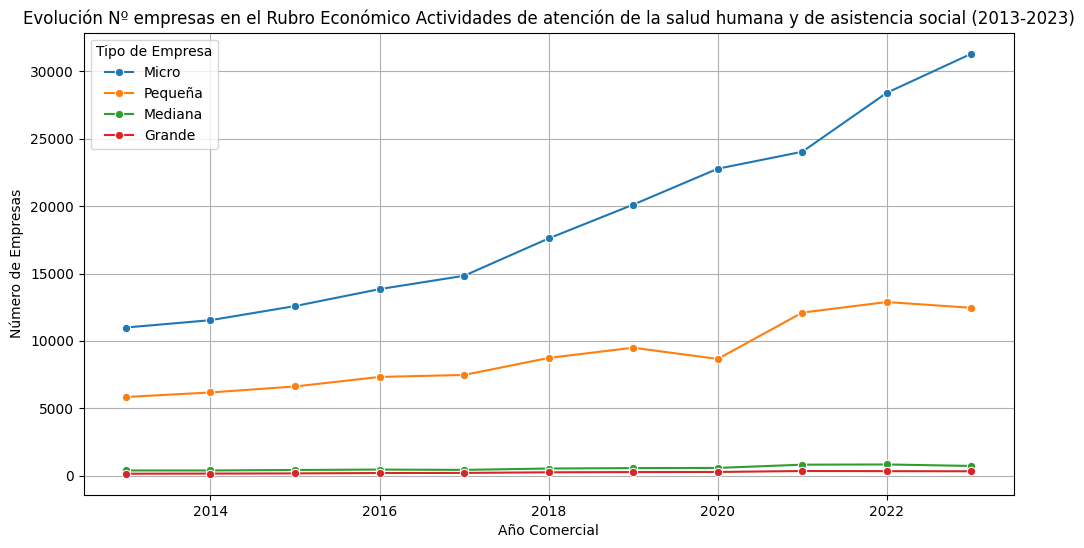

In [ ]:
df_Salud = df[df['Rubro economico'] == 'Q - Actividades de atención de la salud humana y de asistencia social']

# Graficar la evolución del número de empresas por tipo (Micro, Pequeña, Mediana, Grande)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año Comercial', y='Número de empresas', hue='Tramo segun ventas (5 tramos)', data=df_Salud, marker='o')
plt.title('Evolución Nº empresas en el Rubro Económico Actividades de atención de la salud humana y de asistencia social (2013-2023)')
plt.xlabel('Año Comercial')
plt.ylabel('Número de Empresas')
plt.legend(title='Tipo de Empresa')
plt.grid(True)
plt.show()


2. Distribución de Trabajadores por Género: Muestra la distribución de trabajadores dependientes de género femenino y masculino en el sector salud, segmentado por tamaño de empresa. El gráfico de barras apiladas permite observar cómo la participación de trabajadores por género varía en empresas de diferente tamaño.

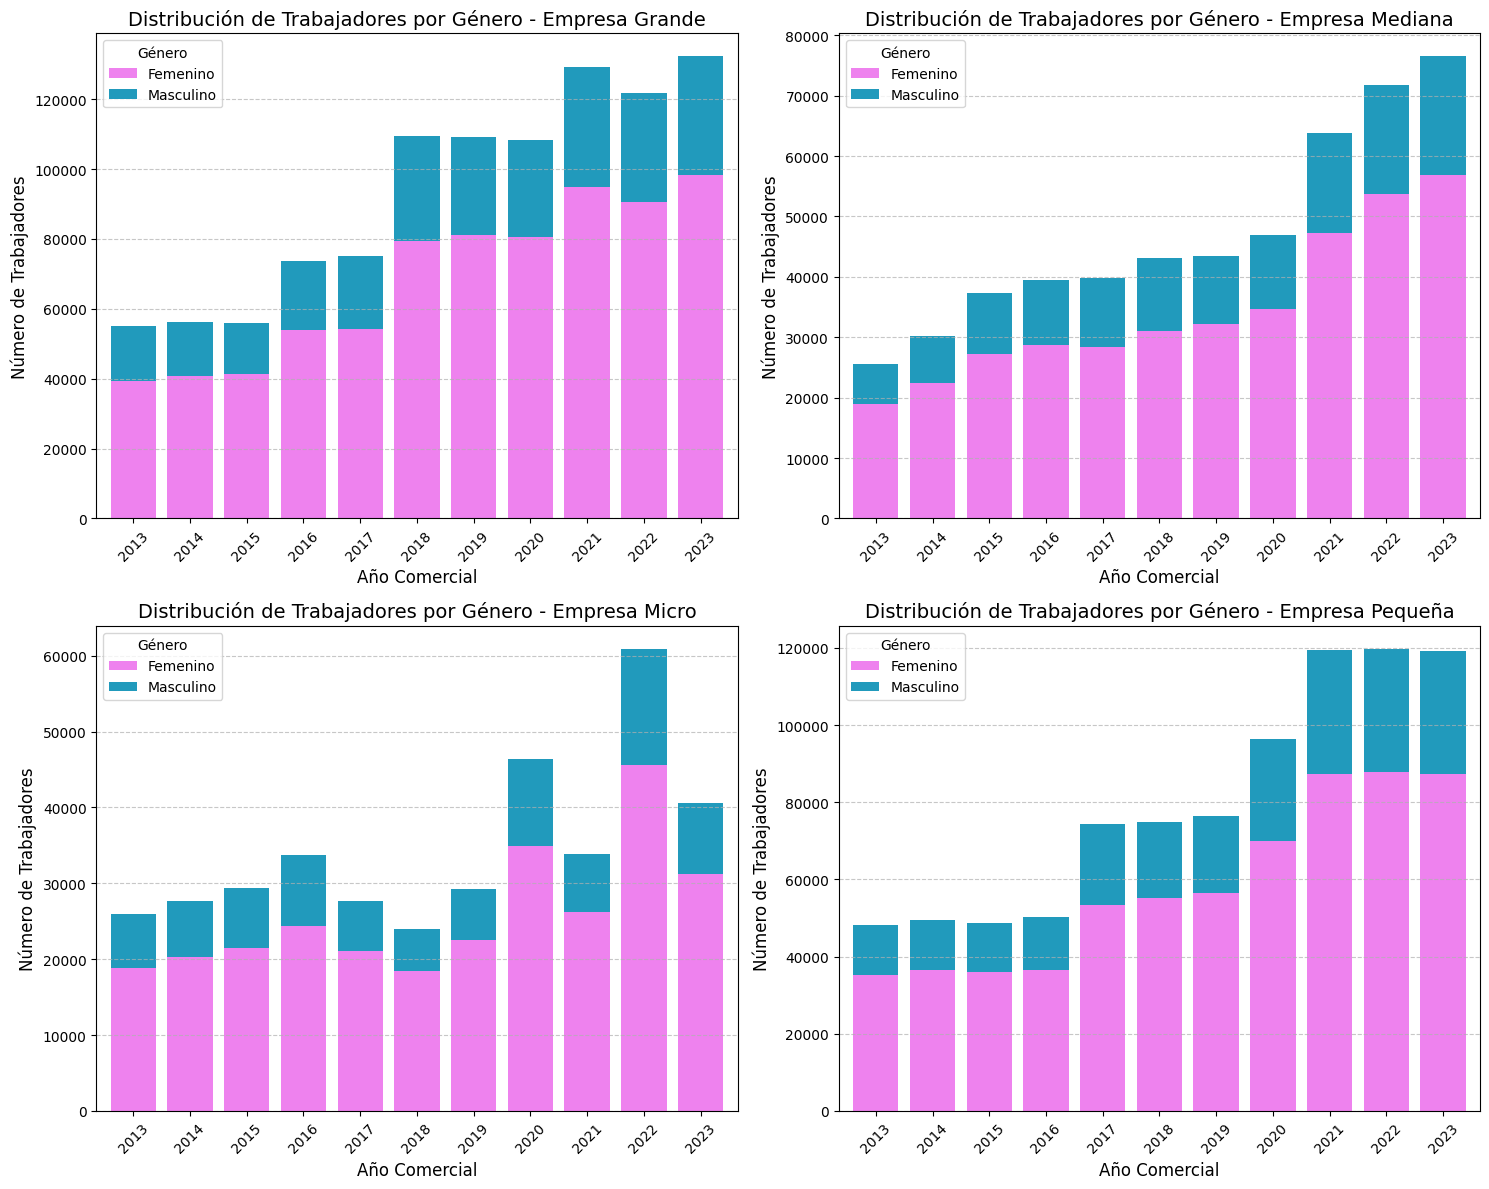

In [ ]:
df_por_genero = df_Salud.groupby(['Año Comercial', 'Tramo segun ventas (5 tramos)'])[['Número de trabajadores dependientes de género femenino informados',
                                                    'Número de trabajadores dependientes de género masculino informados']].sum().reset_index()

tipos_empresa = df_por_genero['Tramo segun ventas (5 tramos)'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, tipo in enumerate(tipos_empresa):
    df_tipo = df_por_genero[df_por_genero['Tramo segun ventas (5 tramos)'] == tipo]

    df_tipo.set_index('Año Comercial')[['Número de trabajadores dependientes de género femenino informados',
                                        'Número de trabajadores dependientes de género masculino informados']].plot(kind='bar',
                                        stacked=True,
                                        ax=axes[i],
                                        width=0.8,
                                        color=['violet', '#219abc'])

    axes[i].set_title(f'Distribución de Trabajadores por Género - Empresa {tipo}', fontsize=14)
    axes[i].set_xlabel('Año Comercial', fontsize=12)
    axes[i].set_ylabel('Número de Trabajadores', fontsize=12)
    axes[i].legend(title='Género', labels=['Femenino', 'Masculino'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3. Distribución de Trabajadores por Tipo de Contrato: Se muestra la evolución de trabajadores dependientes y a honorarios en empresas de diferentes tamaños (Micro, Pequeña, Mediana, Grande). El gráfico de barras permite observar la formalidad en el empleo, diferenciando entre aquellos con contrato dependiente y aquellos bajo la modalidad de honorarios.

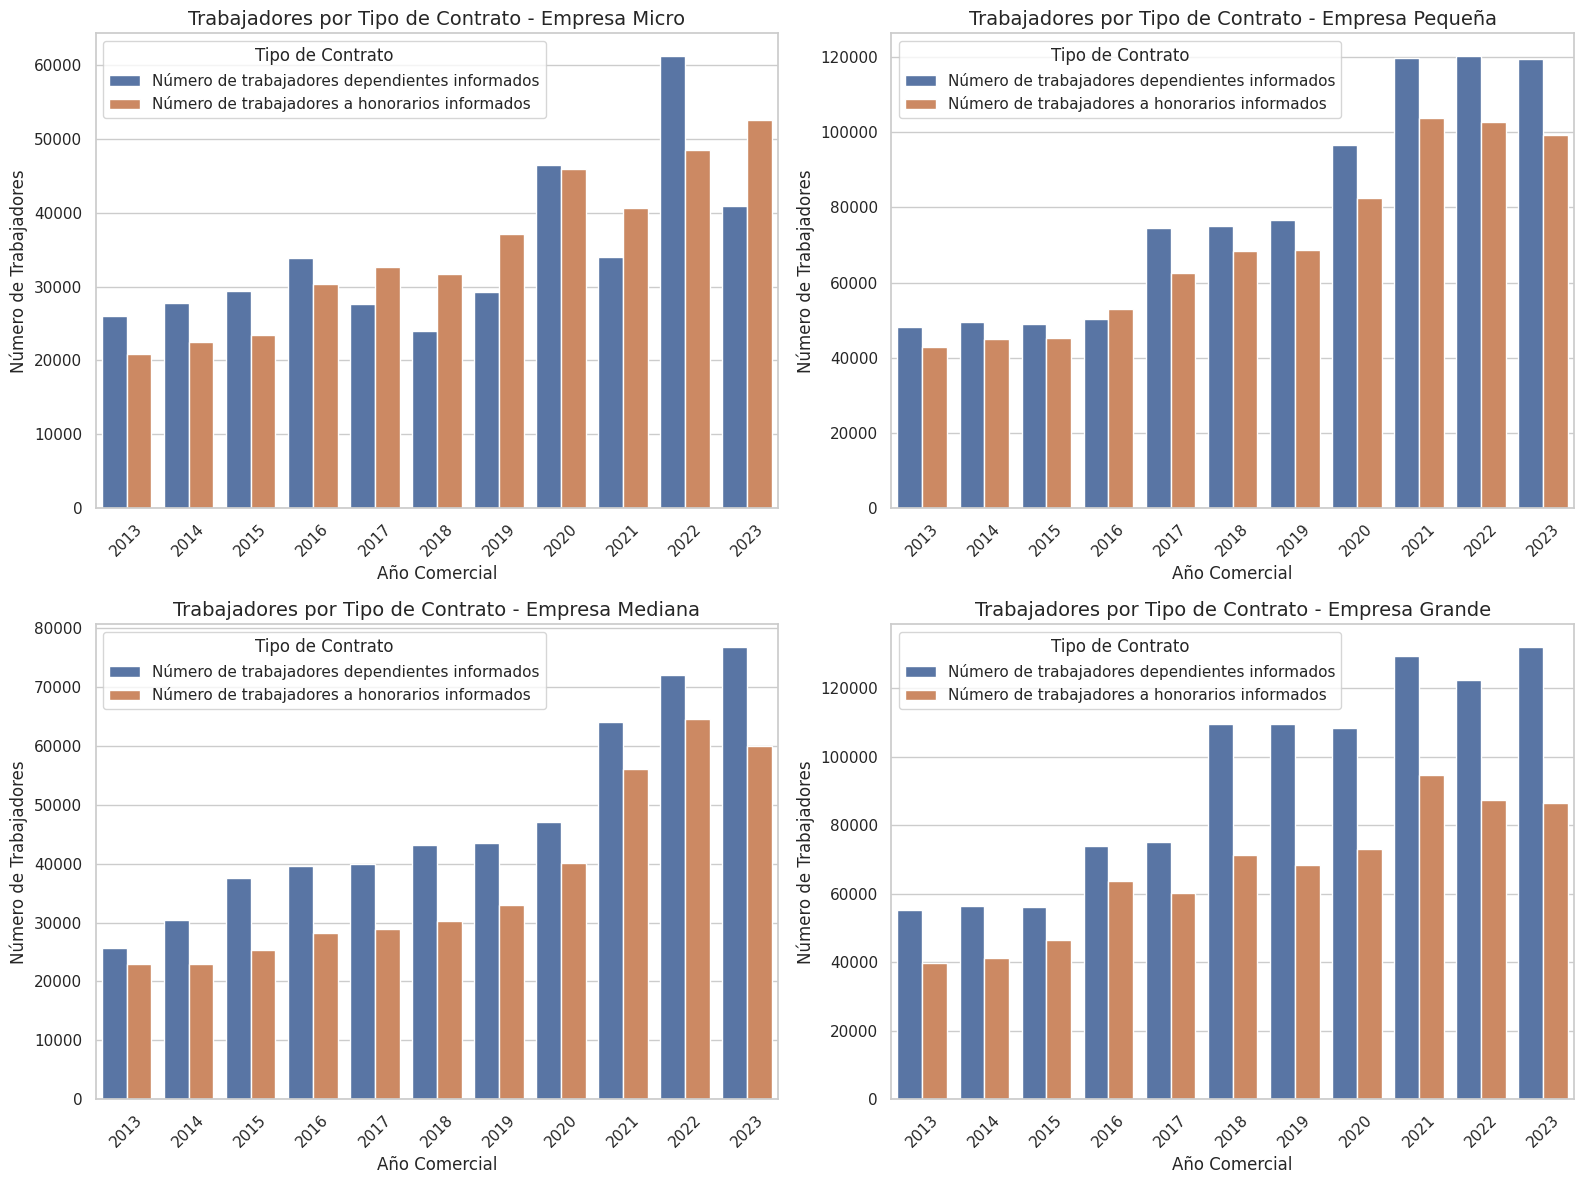

In [ ]:
sns.set(style="whitegrid")


fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, tipo_empresa in enumerate(['Micro', 'Pequeña', 'Mediana', 'Grande']):

    df_tipo_empresa = df_Salud[df_Salud['Tramo segun ventas (5 tramos)'] == tipo_empresa]
    df_por_contrato = df_tipo_empresa.groupby('Año Comercial')[['Número de trabajadores dependientes informados',
                                                                'Número de trabajadores a honorarios informados']].sum().reset_index()

    df_melt = df_por_contrato.melt(id_vars='Año Comercial',
                                   value_vars=['Número de trabajadores dependientes informados',
                                               'Número de trabajadores a honorarios informados'],
                                   var_name='Tipo de Contrato', value_name='Número de Trabajadores')

    ax = axs[i // 2, i % 2]  # Para distribuir en 2 filas y 2 columnas

    sns.barplot(data=df_melt, x='Año Comercial', y='Número de Trabajadores', hue='Tipo de Contrato', ax=ax)

    ax.set_title(f'Trabajadores por Tipo de Contrato - Empresa {tipo_empresa}', fontsize=14)
    ax.set_xlabel('Año Comercial', fontsize=12)
    ax.set_ylabel('Número de Trabajadores', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Tipo de Contrato', loc='upper left')

plt.tight_layout()
plt.show()


Este análisis es solo un punto de partida para explorar en profundidad el sector de la salud en Chile. Si bien se han obtenido algunos resultados interesantes, como la evolución del número de empresas y la distribución de trabajadores por género y tipo de contrato, aún hay mucho más por investigar. Este ejercicio es una forma de aplicar lo aprendido en el módulo de Análisis exploratorio y estadística. Con más datos, análisis, y más experiencia se pueden obtener insights más detallados y útiles para la toma de decisiones en el sector salud.